<a href="https://colab.research.google.com/github/arryaaas/Machine-Learning-Image-Classifier/blob/main/Machine_Learning_Basic_Arya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nama : Mochammad Arya Salsabila
### Submission :  Belajar Machine Learning untuk Pemula

### Import library

In [ ]:
import os
import shutil
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

### Download dataset **rockpaperscissors.zip**

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2021-02-02 08:24:29--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.42MB/s    in 4m 13s  

2021-02-02 08:28:43 (1.22 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



### Mengekstrak file dataset **rockpaperscissors.zip**

In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

### Lihat isi dari file dataset yang telah diekstrak sebelumnya

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['scissors', 'rock', 'rps-cv-images', 'README_rpc-cv-images.txt', 'paper']

### Mengecek total image pada direktori **rock**, **paper**, dan **scissors**

In [ ]:
total_rock_image = len(os.listdir('/tmp/rockpaperscissors/rock'))
total_paper_image = len(os.listdir('/tmp/rockpaperscissors/paper'))
total_scissors_image = len(os.listdir('/tmp/rockpaperscissors/scissors'))

print("Rock image : {}".format(total_rock_image))
print("Paper image : {}".format(total_paper_image))
print("Scissors image : {}".format(total_scissors_image))

Rock image : 726
Paper image : 712
Scissors image : 750


### Menentukan path direktori

In [ ]:
base_dir =  '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

### Membuat direktori train dan validation

In [ ]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

### Membagi direktori **rock**, **paper**, dan **scissors** masing-masing menjadi data train dan validation

In [ ]:
train_rock_dir, validation_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_dir, validation_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors_dir, validation_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

### Menentukan path direktori **train** dan **validation** untuk masing-masing data

In [ ]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

validation_rock = os.path.join(validation_dir, 'rock')
validation_paper = os.path.join(validation_dir, 'paper')
validation_scissors = os.path.join(validation_dir, 'scissors')

### Membuat direktori baru didalam direktori **train** dan **validation** untuk masing-masing data

In [ ]:
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(validation_rock):
  os.mkdir(validation_rock)
if not os.path.exists(validation_paper):
  os.mkdir(validation_paper)
if not os.path.exists(validation_scissors):
  os.mkdir(validation_scissors)

### Menyalin data train dan data validation ke direktori **train** dan **validation** masing-masing data

In [ ]:
for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in validation_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(validation_rock,i))
for i in validation_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(validation_paper,i))
for i in validation_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(validation_scissors,i))

### Membuat objek **image data generator**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip=True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

### Menyiapkan data train untuk dipelajari oleh model

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


### Membuat model

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), padding='same', activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), padding='same', activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), padding='same', activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 256)       2

### Compile model

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

### Membuat kelas callback

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.96):
      print("\nAkurasi telah mencapai > 96%!")
      self.model.stop_training = True
callbacks = myCallback()

### Melatih model

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks = [callbacks]
)

Epoch 1/20
25/25 - 49s - loss: 1.0908 - accuracy: 0.3875 - val_loss: 1.0066 - val_accuracy: 0.4437
Epoch 2/20
25/25 - 48s - loss: 0.6877 - accuracy: 0.6950 - val_loss: 0.4970 - val_accuracy: 0.7875
Epoch 3/20
25/25 - 48s - loss: 0.3176 - accuracy: 0.8863 - val_loss: 0.3062 - val_accuracy: 0.8687
Epoch 4/20
25/25 - 48s - loss: 0.2642 - accuracy: 0.9162 - val_loss: 0.2596 - val_accuracy: 0.8938
Epoch 5/20
25/25 - 48s - loss: 0.2365 - accuracy: 0.9100 - val_loss: 0.2271 - val_accuracy: 0.9062
Epoch 6/20
25/25 - 47s - loss: 0.2016 - accuracy: 0.9400 - val_loss: 0.1848 - val_accuracy: 0.9312
Epoch 7/20
25/25 - 47s - loss: 0.1714 - accuracy: 0.9375 - val_loss: 0.1766 - val_accuracy: 0.9187
Epoch 8/20
25/25 - 47s - loss: 0.1941 - accuracy: 0.9400 - val_loss: 0.2783 - val_accuracy: 0.9312
Epoch 9/20
25/25 - 47s - loss: 0.1688 - accuracy: 0.9362 - val_loss: 0.2116 - val_accuracy: 0.9563
Epoch 10/20
25/25 - 48s - loss: 0.1562 - accuracy: 0.9538 - val_loss: 0.0632 - val_accuracy: 0.9812
Epoch 11/

### Visualisasi data untuk model accuracy dan model loss

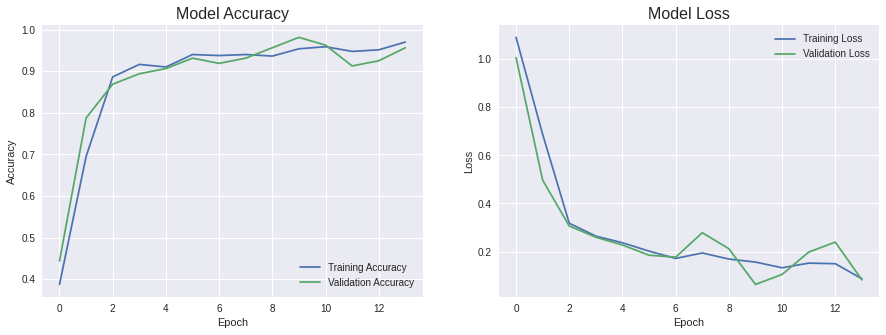

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.style.use('seaborn')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax[0].plot(acc, label='Training Accuracy')
ax[0].plot(val_acc, label='Validation Accuracy')
ax[0].legend(loc='lower right')
ax[0].set_title("Model Accuracy", fontsize=16)
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Accuracy")

ax[1].plot(loss, label='Training Loss')
ax[1].plot(val_loss, label='Validation Loss')
ax[1].legend(loc='upper right')
ax[1].set_title("Model Loss", fontsize=16)
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")

plt.show()

### Memprediksi gambar yang diunggah

Saving AbZoX8Iv6xigsR42.png to AbZoX8Iv6xigsR42.png
AbZoX8Iv6xigsR42.png
Rock


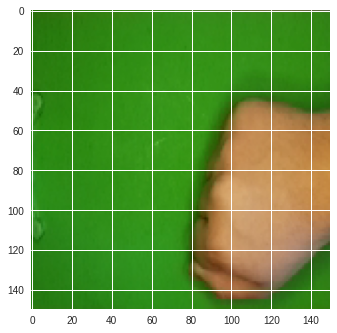

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('Paper')
  elif classes[0,1]!=0:
    print('Rock')
  else:
    print('Scissors')